In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd
from torch.utils.data import Dataset
import tqdm
import matplotlib.pyplot as plt

In [33]:
%cd /opt/ml/data/train/classify
!pwd
!mkdir class0 class1 class2 class3 class4 class5 class6 class7 class8 class9 class10 class11 class12 class13 class14 class15

/opt/ml/data/train/classify
/opt/ml/data/train/classify


In [112]:
get_number = pd.read_csv(r'/opt/ml/data/train/train.csv').iloc[900-1:2699 + 1, :]
get_number

,id,gender,race,age,path
899,001652,female,Asian,35,001652_female_Asian_35
900,001653,female,Asian,36,001653_female_Asian_36
901,001655,female,Asian,58,001655_female_Asian_58
902,001656,female,Asian,60,001656_female_Asian_60
903,001657,female,Asian,18,001657_female_Asian_18
...,...,...,...,...,...
2695,006954,male,Asian,19,006954_male_Asian_19
2696,006955,male,Asian,19,006955_male_Asian_19
2697,006956,male,Asian,19,006956_male_Asian_19
2698,006957,male,Asian,20,006957_male_Asian_20


In [12]:
class MaskDataset(Dataset):
    
    def __init__(self, mode:str):
        self.LOCATE = None
        self.CSV = None
        if mode == 'train':
            self.LOCATE = r'/opt/ml/data/train'
            self.CSV = 'train.csv'
        else:
            self.LOCATE = r'/opt/ml/data/eval'
            
        self.locate_datas = pd.read_csv(self.LOCATE+"/"+self.CSV)
        
    
    def __len__(self):
        pass
    
    def __getitem__(self,idx):
        pass

In [55]:
get_data = pd.read_csv(r'/opt/ml/data/train/train.csv')
get_data = get_data.drop(['race','id'],axis=1)
print(get_data.count)
print(get_data.values)
print(get_data['path'].values)

<bound method DataFrame.count of       gender  age                    path
0     female   45  000001_female_Asian_45
1     female   52  000002_female_Asian_52
2       male   54    000004_male_Asian_54
3     female   58  000005_female_Asian_58
4     female   59  000006_female_Asian_59
...      ...  ...                     ...
2695    male   19    006954_male_Asian_19
2696    male   19    006955_male_Asian_19
2697    male   19    006956_male_Asian_19
2698    male   20    006957_male_Asian_20
2699    male   19    006959_male_Asian_19

[2700 rows x 3 columns]>
[['female' 45 '000001_female_Asian_45']
 ['female' 52 '000002_female_Asian_52']
 ['male' 54 '000004_male_Asian_54']
 ...
 ['male' 19 '006956_male_Asian_19']
 ['male' 20 '006957_male_Asian_20']
 ['male' 19 '006959_male_Asian_19']]
['000001_female_Asian_45' '000002_female_Asian_52' '000004_male_Asian_54'
 ... '006956_male_Asian_19' '006957_male_Asian_20' '006959_male_Asian_19']


450

[['male' 46 '005557_male_Asian_46']
 ['male' 52 '005558_male_Asian_52']
 ['male' 52 '005559_male_Asian_52']
 ...
 ['male' 19 '006956_male_Asian_19']
 ['male' 20 '006957_male_Asian_20']
 ['male' 19 '006959_male_Asian_19']]


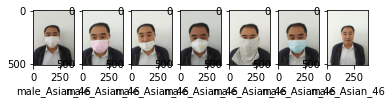

In [109]:
# 내 라벨링 해야 하는 데이터들이었음
ROOT = '/opt/ml/data/train/images/'
target = get_data.values[-450:]
locate = [ROOT + i for i in get_data['path'].values[-450:]]
images = []
print(target)
for files in locate:
    temp = []
    for j in os.listdir(files):
        if not j[0] == '.':
            temp.append(files+'/'+j)
    images.append(temp)
images[:5]
im = Image.open(images[0][0])
fig = plt.figure()
rows = 1
cols = 7
k = 1
for i in range(len(target)):
    for j in range(len(images[0])):
#         print(f'{target[i][2]} : {images[i][j]}')
        img = Image.open(images[i][j])
        ax = fig.add_subplot(rows, cols,k)
        ax.imshow(img)
        ax.set_xlabel(target[i][2][-13:])
        k +=1
    break
plt.show()

In [68]:
image_locate = [get_data.LOCATE+'/images/'+i for i in get_data.locate_datas['path'].values]
print(image_locate[:5])
images = [file_name for file_name in os.listdir(image_locate[0]) if not file_name[0] == '.']

im = Image.open(image_locate[0] +'/'+ images[0])
im

AttributeError: 'DataFrame' object has no attribute 'locate_datas'

In [2]:
def show_ratio(df):
	df['mask'] = df['ans'].apply(lambda x: 0 if x<6 else (1 if x<12 else 2))
	df['gender'] = df['ans'].map(lambda x: 0 if x in [0, 1, 2, 6, 7, 8, 12, 13, 14] else 1)
	display(df['mask'].value_counts(normalize=True))
	display(df['gender'].value_counts(normalize=True))

비교하고자하는 결과의 경로를 입력해주세요:  /opt/ml/team12/image-classification-level1-12/saved/submission/0902_18_final_submission.csv


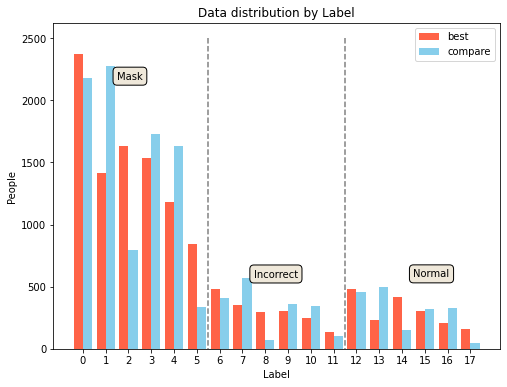

0    0.712460
1    0.144444
2    0.143095
Name: mask, dtype: float64

0    0.609365
1    0.390635
Name: gender, dtype: float64

0    0.710794
1    0.146825
2    0.142381
Name: mask, dtype: float64

0    0.587222
1    0.412778
Name: gender, dtype: float64

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

best_1 = pd.read_csv('/opt/ml/image-classification-level1-12/sm/guideline/output (3).csv')
# best_2 = pd.read_csv('/opt/ml/team12/image-classification-level1-12/saved/submission/mickey_submission0830.csv')
compare_path = input('비교하고자하는 결과의 경로를 입력해주세요: ')
pred_1 = pd.read_csv(compare_path)
plt.figure(figsize=(8, 6))

label_data = best_1['ans'].value_counts().sort_index()
compare_data = pred_1['ans'].value_counts().sort_index()
plt.bar(label_data.index-0.2, label_data, color='tomato', width=0.4, label='best')
plt.bar(compare_data.index+0.2, compare_data, color='skyblue', width=0.4, label='compare')

# plt.bar(label_data[6:12].index-0.5, label_data[6:12], color='tomato', width=0.5, label='best')
# plt.bar(label_data[12:].index-0.5, label_data[12:], color='tomato', width=0.5, label='best')
plt.xticks(label_data.index)
plt.annotate('Mask', (1.5, label_data.max()-200), fontsize=10, bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8da', linewidth=1))
plt.annotate('Incorrect', (7.5, label_data[6:12].max()+100), fontsize=10, bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8da', linewidth=1))
plt.annotate('Normal', (14.5, label_data[12:].max()+100), fontsize=10, bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8da', linewidth=1))
plt.plot([5.5, 5.5], [2500, 0], linestyle='--', color='gray')
plt.plot([11.5, 11.5], [2500, 0], linestyle='--', color='gray')
plt.xlabel('Label')
plt.ylabel('People')
plt.title('Data distribution by Label')
plt.legend()
plt.show()

show_ratio(best_1)
show_ratio(pred_1)